Final Física Teórica 1 \
Daiana Dominikow - 2022 \
L.32529 \
Fuerzas centrales, método de Euler

In [65]:
import math
import scipy.constants
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,8)

In [66]:
def movimiento_dos_cuerpos(masa1, masa2, distancia, tiempo, dt):
        
    #entran por parametro
    m1 = masa1 #masa de la primer estrella
    m2 = masa2 #masa de la segunda estrella
    d = distancia #distancia entre las estrellas
    tf = tiempo  
    dt = dt

    #cálculos
    t = np.arange(0 , tf + dt ,dt)
    t_len = len(t) - 1
    M = m1+m2 
    mu = m1*m2/M #masa reducida
    #posición centros de masa
    x1 = -(m2/M)*d
    x2 = (m1/M)*d
    #posicion masas
    pos1_inicial = np.array([x1,0,0])
    pos2_inicial = np.array([x2,0,0])
    r = pos2_inicial - pos1_inicial

    #centro de masa
    cm = (pos1_inicial*m1 + pos2_inicial*m2)/M

    #ahora, les tengo que dar un momento inicial a ambas estrellas
    #solo necesito la velocidad  de una de ellas
    v_1 = math.sqrt(scipy.constants.G * m2 * np.linalg.norm(pos1_inicial)/np.linalg.norm(r)**2)
    #para una orbita circular
    v1_inicial = np.array([0,v_1,0])

    #por conservacion del momento
    p1_inicial = m1*v1_inicial
    p2_inicial=-p1_inicial
    g_cte = -scipy.constants.G*m1*m2
    l = np.linalg.norm(np.cross(pos1_inicial,p1_inicial) + np.cross(pos2_inicial,p2_inicial))  
    energia_potencial(pos1_inicial,pos2_inicial, mu, p1_inicial, p2_inicial, g_cte, l, t_len)
    velocidad(pos1_inicial, pos2_inicial, m1, m2,p1_inicial, p2_inicial, g_cte, t_len)
    posicion(pos1_inicial, pos2_inicial, m1, m2,p1_inicial, p2_inicial, g_cte, t)

In [67]:
def energia_potencial(m1_pos, m2_pos,mu, m1_p, m2_p, g_cte, l, t_len ):
    i=0
    Ug = []
    Uc = []
    Uef = []
    star1=m1_pos
    star2=m2_pos
    r = m2_pos - m1_pos
    r_norm = []
    star1p = m1_p
    star2p = m2_p

    while i<t_len:
        r = star2 - star1
        r_norm.append(np.linalg.norm(r))
        #para este grafico necesito la magnitud de la fuerza
        F2 = g_cte/r_norm[i]**2
        star1p = star1p - F2*dt
        star2p = star2p + F2*dt
        star1 = star1 + (star1p*dt)/m1
        star2 = star2 + (star2p*dt)/m2

        Ug.append(g_cte/r_norm[i])
        Uc.append(l**2/(2*mu*r_norm[i]**2))
        Uef.append(Uc[i]+ Ug[i])
        
        i=i+1


    plt.figure(1)    
    plt.plot(r_norm,Ug,'green',label='Ug')
    plt.plot(r_norm,Uc,'blue',label='Uc')
    plt.plot(r_norm,Uef,'red',label='Uef')
    plt.xlabel("Distancia")
    plt.ylabel("Energia potencial")   
    plt.legend()
    plt.show()

In [68]:
def velocidad(m1_pos, m2_pos, m1, m2, m1_p, m2_p, g_cte, t_len):
    i = 0
    r_norm = []
    r = m2_pos - m1_pos
    r_norm = []
    r_norm.append(np.linalg.norm(r))
    star1p = m1_p 
    star2p = m2_p
    star1 = m1_pos
    star2= m2_pos

    while i<t_len:
        r_uni = r / r_norm[i]
        #pero para este otro grafico necesito el vector fuerza
        F2 = g_cte*r_uni/r_norm[i]**2
        star1p = star1p - F2*dt
        star2p = star2p + F2*dt
        star1 = star1 + (star1p*dt)/m1
        star2 = star2 + (star2p*dt)/m2
        r = star2 - star1
        r_norm.append(np.linalg.norm(r))


        plt.figure(2)
        plt.plot(i,np.linalg.norm(star2p/m2),'.r')
        plt.plot(i,np.linalg.norm(star1p/m1),'.b')
        plt.xlabel("Intervalo de tiempo")
        plt.ylabel("Velocidad")


        i=i+1

In [69]:
def posicion(m1_pos, m2_pos, m1, m2, m1_p, m2_p, g_cte, t):
   
    i = 0
    r_norm = []
    r = m2_pos - m1_pos
    r_norm = []
    r_norm.append(np.linalg.norm(r))
    star1p=[]
    star2p=[]
    star1=[]
    star2=[]
    star1p.append(m1_p) 
    star2p.append(m2_p)
    star1.append(m1_pos)
    star2.append(m2_pos)
    t_len = len(t) -1

    while i<t_len:
        r_uni = r / r_norm[i]
        #pero para este otro grafico necesito el vector fuerza
        F2 = g_cte*r_uni/r_norm[i]**2
        star1p.append(star1p[i] - F2*dt)
        star2p.append(star2p[i] + F2*dt)
        star1.append(star1[i] + (star1p[i+1]*dt)/m1)
        star2.append(star2[i] + (star2p[i+1]*dt)/m2)
        r = star2[i+1] - star1[i+1]
        r_norm.append(np.linalg.norm(r))
        i=i+1

    star1= np.asarray(star1)
    star2= np.asarray(star2)
    star1v= np.asarray(star1p)/m1
    star2v= np.asarray(star2p)/m2 

    plt.figure(1)
    plt.plot(t,r_norm,'teal')
    plt.xlabel("Tiempo")
    plt.ylabel("Distancia entre los cuerpos")   

    plt.figure(2)
    plt.plot(star1[:,0],star1[:,1],'orange',label ='Posicion X-Y Cuerpo 1')
    plt.plot(star2[:,0],star2[:,1],'pink', label ='Posicion X-Y Cuerpo 2')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()

    #plt.figure(3)
    #plt.plot(star1v[:,0],star1v[:,1],'blue', label ='Velocidad X-Y Cuerpo 1')
    #plt.plot(star2v[:,0],star2v[:,1],'green', label ='Velocidad X-Y Cuerpo 2')
    #plt.legend()


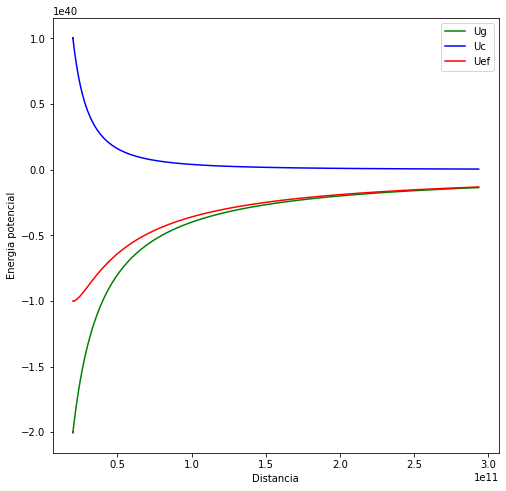

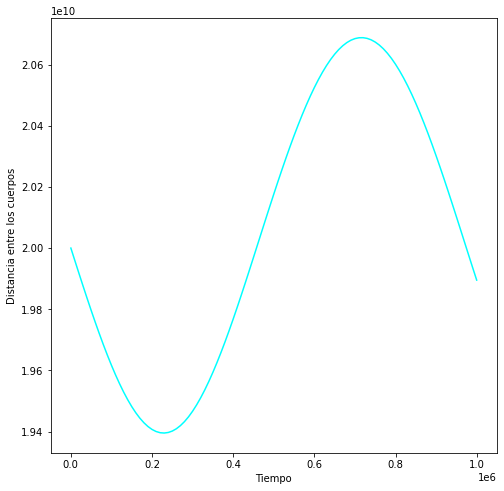

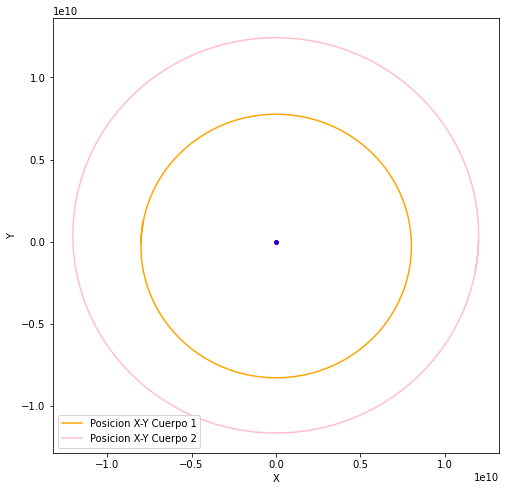

In [70]:
#prueba    1: valores random 
m1 = 3e30 #masa de la primer estrella
m2 = 2e30 #masa de la segunda estrella
d = 2e10 #distancia entre las estrellas
tf = 1e6  
dt = 1e4

movimiento_dos_cuerpos(m1,m2,d,tf,dt)

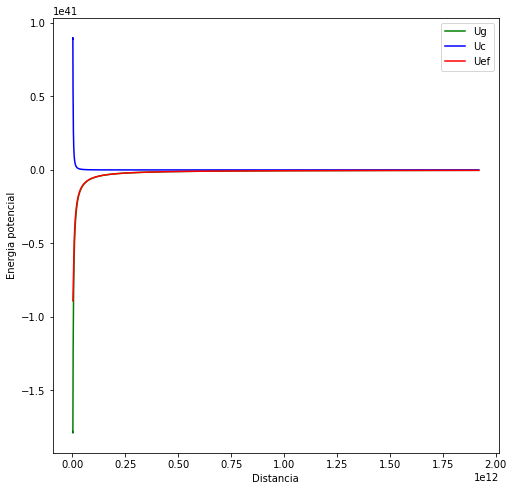

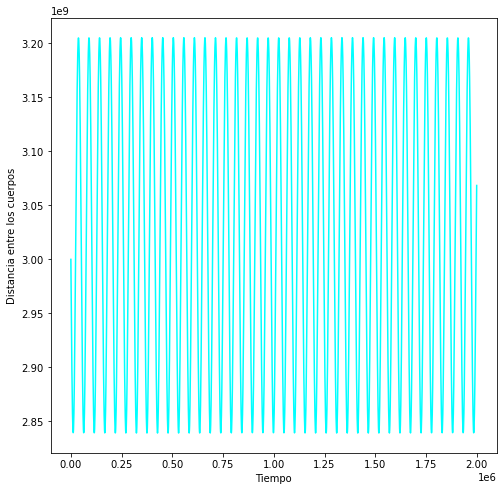

c:\Users\Daiana\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


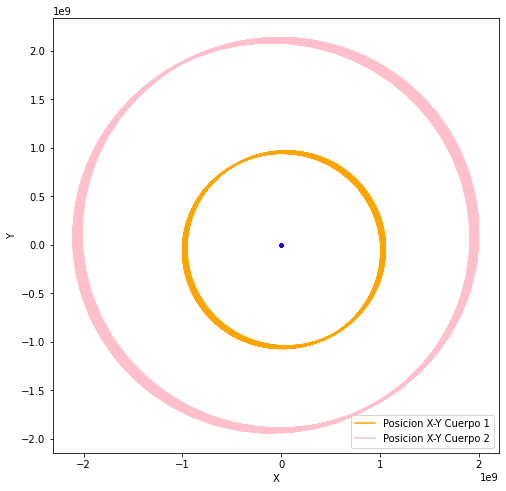

In [71]:
#prueba 2: Sistema de estrellas Sirius!!
m1 = 4e30 #masa de SiriusA
m2 = 2e30 #masa de SiriusB
d = 3e9 #distancia entre las estrellas
tf = 2e6  
dt = 1e3

movimiento_dos_cuerpos(m1,m2,d,tf,dt)